In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install scikit-learn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/10.7 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/10.7 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/10.7 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/10.7 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/10.7 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/10.7 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/10.7 MB 1.2 MB/s eta 0:00:08
   --------- -----------------------------

In [27]:
%pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load data
df = pd.read_csv('Churn.csv')


 



In [15]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Remove unnecessary ID column
df.drop('Customer ID', axis=1, inplace=True)

In [16]:
# Strip whitespace from all string entries (optional, safe)
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()



In [17]:
# Handle missing values in 'Total Charges'
df['Total Charges'] = df['Total Charges'].replace(" ", pd.NA)
df['Total Charges'] = pd.to_numeric(df['Total Charges'])
df.dropna(inplace=True)

In [6]:
#encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Separate features and label
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [6]:
# Check for duplicates



df.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df.duplicated().sum()}")  

# Check for nulls
print("\nMissing values per column:")
print(df.isnull().sum())  # Should all be 0

# Check data types
print("\nData types:")
print(df.dtypes)

# Optional: preview cleaned data
print("\nSample cleaned data:")
print(df.head())



Duplicates after removal: 0

Missing values per column:
Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

Data types:
Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object


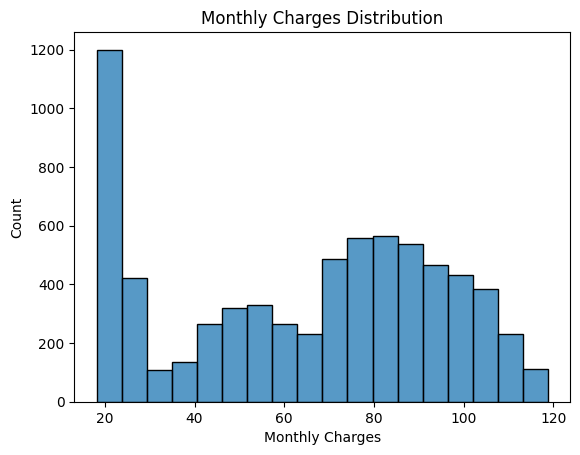

In [7]:
# Histogram of a continuous variable
sns.histplot(df['Monthly Charges'])
plt.title('Monthly Charges Distribution')
plt.show()


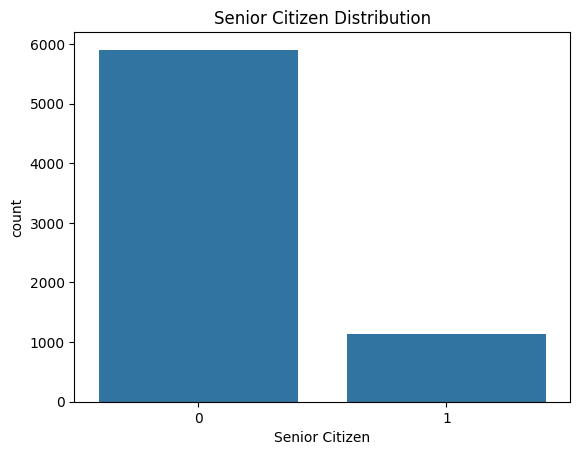

In [8]:
# Count plot of a categorical variable
sns.countplot(x='Senior Citizen', data=df)
plt.title('Senior Citizen Distribution')
plt.show()

In [5]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Debug: Check what columns exist
print("Available columns after stripping:")
print(df.columns.tolist())
print(f"DataFrame shape: {df.shape}")

# Find the churn column (case-insensitive search)
churn_col = None
for col in df.columns:
    if 'churn' in col.lower():
        churn_col = col
        break

if churn_col is None:
    print("Error: No column containing 'churn' found!")
    print("Please check your column names above.")
else:
    print(f"Found churn column: '{churn_col}'")
    
    # Check unique values in the churn column
    print(f"Unique values in {churn_col}: {df[churn_col].unique()}")
    
    # Keep a copy of Churn and convert it to binary
    target = df[churn_col].map({'Yes': 1, 'No': 0})
    
    # Check if mapping worked correctly
    if target.isna().any():
        print("Warning: Some values couldn't be mapped. Check unique values above.")
        print("Unmapped values:", df[churn_col][target.isna()].unique())
    
    # Identify categorical features excluding the churn column
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    
    # Remove the churn column from categorical columns
    if churn_col in cat_cols:
        cat_cols.remove(churn_col)
    
    print(f"Categorical columns to encode: {cat_cols}")
    
    # One-hot encode categorical features
    df_encoded = pd.get_dummies(df.drop(churn_col, axis=1), columns=cat_cols)
    
    # Final feature and target split
    X = df_encoded
    y = target
    
    print(f"Final feature matrix shape: {X.shape}")
    print(f"Target variable shape: {y.shape}")
    print(f"Target distribution:\n{y.value_counts()}")
    
    # Display first few columns of the encoded features
    print(f"First 5 feature columns: {X.columns[:5].tolist()}")

Available columns after stripping:
['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn']
DataFrame shape: (7044, 21)
Found churn column: 'Churn'
Unique values in Churn: ['No' 'Yes']
Categorical columns to encode: ['Customer ID', 'Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges']
Final feature matrix shape: (7044, 13619)
Target variable shape: (7044,)
Target distribution:
Churn
0    5175
1    1869
Name: count, dtype: int64
First 5 feature columns: ['Senior Citizen', 'tenure', 'Monthly Charges', 

In [ ]:
#build
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

# Build the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# Display model architecture
print("\nModel Architecture:")
model.summary()

Training set shape: (5635, 13619)
Test set shape: (1409, 13619)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,743,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,753,729 (6.69 MB)

 Trainable params: 1,753,729 (6.69 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#training and predicting
# Set up callbacks for better training
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Train the model
print("\nTraining the model...")
history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



Training the model...
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.7328 - loss: 0.5703 - precision: 0.3125 - recall: 0.0461 - val_accuracy: 0.7720 - val_loss: 0.4682 - val_precision: 0.6397 - val_recall: 0.2949 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.8293 - loss: 0.3671 - precision: 0.7576 - recall: 0.5390 - val_accuracy: 0.7480 - val_loss: 0.4883 - val_precision: 0.5129 - val_recall: 0.7390 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9514 - loss: 0.1238 - precision: 0.9249 - recall: 0.8920 - val_accuracy: 0.7418 - val_loss: 0.5695 - val_precision: 0.5046 - val_recall: 0.7390 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9937 - loss: 0.0215 - precision: 0.9946 - recall: 0.9829 - val_accuracy: 0.7294 - val_loss: 0.6587 - val_precision: 0.4883 - val_recall: 0.7085 - learning_rate: 0.0010
Epoch 5/100
141/141 ━━━━━━━━━━━━

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Test Results:
Test Loss: 0.6096
Test Accuracy: 0.6338
Test Precision: 0.4110
Test Recall: 0.8770

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1035
           1       0.41      0.88      0.56       374

    accuracy                           0.63      1409
   macro avg       0.67      0.71      0.62      1409
weighted avg       0.79      0.63      0.65      1409



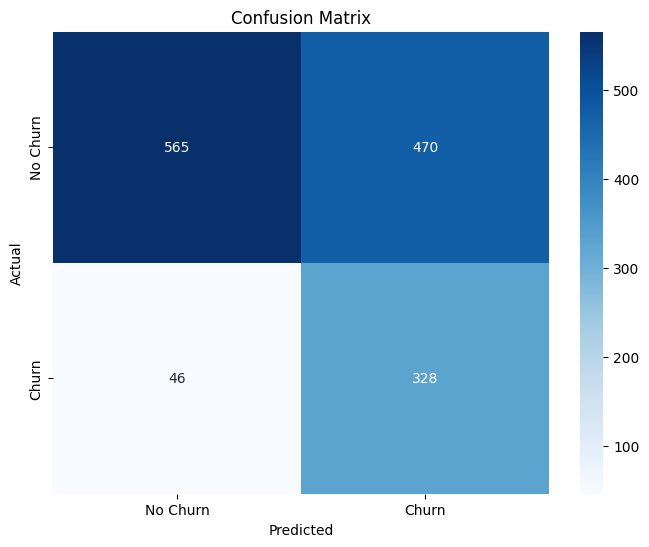

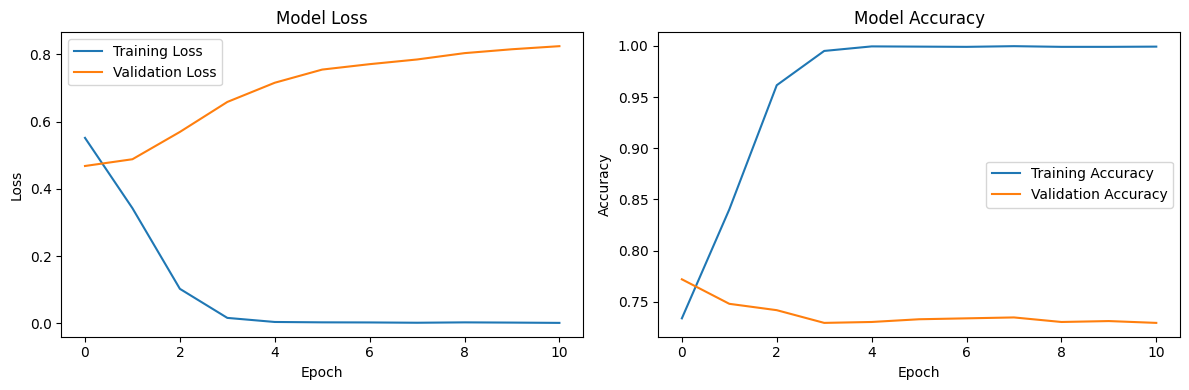

In [10]:
#evaluation and prediction
# Make predictions on test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
#saving the model
# Save the trained model
model.save('churn_prediction_model.h5')
print("\nModel saved as 'churn_prediction_model.h5'")

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

# Save feature names for future reference
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print("Feature names saved as 'feature_names.pkl'")



Model saved as 'churn_prediction_model.h5'
Scaler saved as 'scaler.pkl'
Feature names saved as 'feature_names.pkl'


In [12]:
#loading the saved model
def load_model_and_predict(new_data):
    """
    Function to load the saved model and make predictions on new data
    
    Args:
        new_data: DataFrame with the same structure as training data (before encoding)
    
    Returns:
        predictions: Array of predictions (0 or 1)
        probabilities: Array of prediction probabilities
    """
    
    # Load the saved model
    loaded_model = keras.models.load_model('churn_prediction_model.h5')
    
    # Load the scaler
    loaded_scaler = joblib.load('scaler.pkl')
    
    # Load feature names
    loaded_feature_names = joblib.load('feature_names.pkl')
    
    # Preprocess the new data (same as training data)
    new_data.columns = new_data.columns.str.strip()
    
    # Remove churn column if it exists
    if churn_col in new_data.columns:
        new_data = new_data.drop(churn_col, axis=1)
    
    # One-hot encode categorical features
    cat_cols_new = new_data.select_dtypes(include='object').columns.tolist()
    new_data_encoded = pd.get_dummies(new_data, columns=cat_cols_new)
    
    # Ensure all features from training are present
    for feature in loaded_feature_names:
        if feature not in new_data_encoded.columns:
            new_data_encoded[feature] = 0
    
    # Reorder columns to match training data
    new_data_encoded = new_data_encoded[loaded_feature_names]
    
    # Scale the features
    new_data_scaled = loaded_scaler.transform(new_data_encoded)
    
    # Make predictions
    probabilities = loaded_model.predict(new_data_scaled)
    predictions = (probabilities > 0.5).astype(int).flatten()
    
    return predictions, probabilities.flatten()

# Example of how to use the loaded model
print("\n" + "="*50)
print("EXAMPLE: Using the saved model for new predictions")
print("="*50)

# Example: Create a sample for prediction (replace with your actual new data)
sample_data = X_test.iloc[:5].copy()  # Taking first 5 test samples as example

# Use the function to make predictions
try:
    predictions, probabilities = load_model_and_predict(sample_data)
    
    print("Sample predictions:")
    for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
        print(f"Sample {i+1}: Prediction = {pred}, Probability = {prob:.4f}")
        
except Exception as e:
    print(f"Error in prediction: {e}")

print("\nModel training and saving completed!")


EXAMPLE: Using the saved model for new predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Sample predictions:
Sample 1: Prediction = 0, Probability = 0.2333
Sample 2: Prediction = 0, Probability = 0.2804
Sample 3: Prediction = 0, Probability = 0.4410
Sample 4: Prediction = 1, Probability = 0.5558
Sample 5: Prediction = 1, Probability = 0.6354

Model training and saving completed!
